<a href="https://colab.research.google.com/github/jkauffm4/Intro-to-ML/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#import everything at once this time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
#breast_dataset['label'].replace(0, 'Benign',inplace=True)
#breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [ ]:
X_breast_data = breast_dataset.iloc[0:569,0:29].values
Y_breast_data = breast_dataset.iloc[:,30].values
sscale = StandardScaler()
X_breast_standardized = sscale.fit_transform(X_breast_data)
X_breast_train, X_breast_test, Y_breast_train, Y_breast_test = train_test_split(X_breast_standardized, Y_breast_data, train_size = .8, test_size = .2, random_state = 100)

In [ ]:
pca = PCA(n_components=7)
X_breast_pca = pca.fit_transform(X_breast_train)
SVM_model = SVC(kernel='linear', C=1E10)
SVM_model.fit(X_breast_pca, Y_breast_train)

In [ ]:
X_breast_pca_test = pca.fit_transform(X_breast_test)
Y_breast_prediction = SVM_model.predict(X_breast_pca_test)

Text(0.5, 427.9555555555555, 'Predicted label')

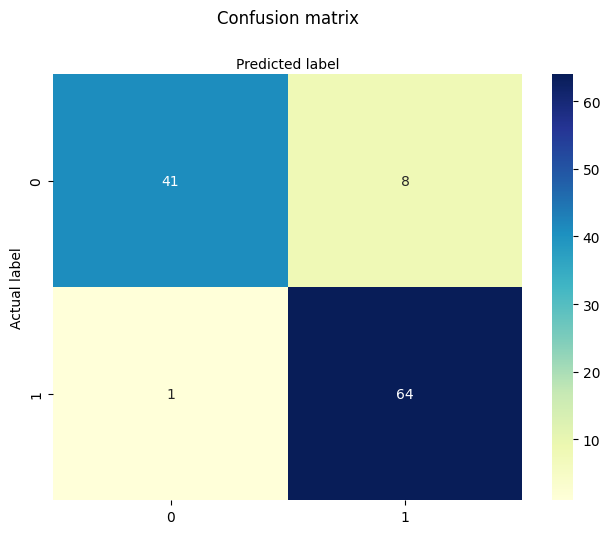

In [ ]:
cmatrix_breast_penalty = confusion_matrix(Y_breast_test, Y_breast_prediction)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast_penalty), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y_breast_prediction))
print("Precision:",metrics.precision_score(Y_breast_test, Y_breast_prediction))
print("Recall:",metrics.recall_score(Y_breast_test, Y_breast_prediction))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y_breast_prediction))

Accuracy: 0.8859649122807017
Precision: 0.8421052631578947
Recall: 0.9846153846153847
F1 Score: 0.9078014184397163


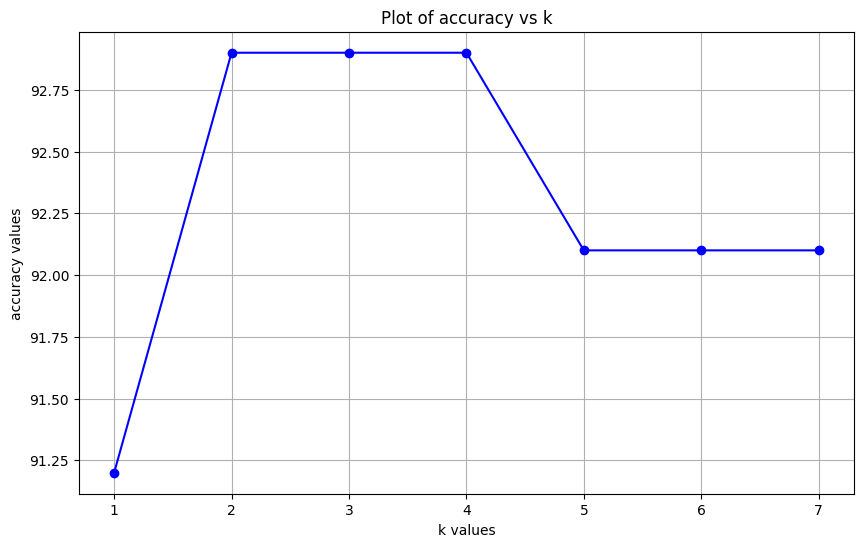

In [ ]:
# Sample input values
accuracy_values = [91.2, 92.9, 92.9, 92.9, 92.1, 92.1, 92.1]
precision_values = [89.9, 90.1, 89, 89, 92.4, 92.4, 88.8]
recall_values = [95.4, 98.5, 100, 100, 93.8, 93.8, 98.46]
f1_values = [.92, .941, .94, .94, .931, .931, .934]
k_values = [1, 2, 3, 4, 5, 6, 7]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Plot of accuracy vs k')
plt.ylabel('accuracy values')
plt.xlabel('k values')

# Show grid
plt.grid()

# Show the plot
plt.show()

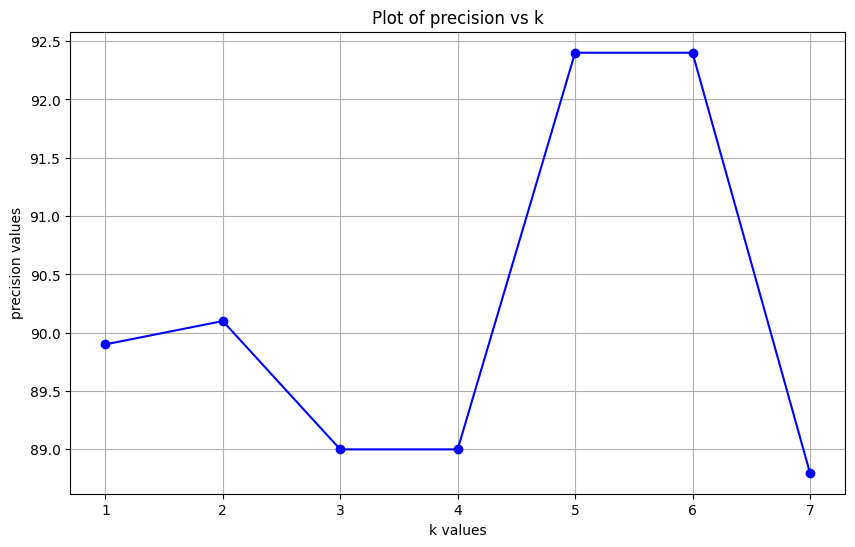

In [ ]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Plot of precision vs k')
plt.ylabel('precision values')
plt.xlabel('k values')

# Show grid
plt.grid()

# Show the plot
plt.show()

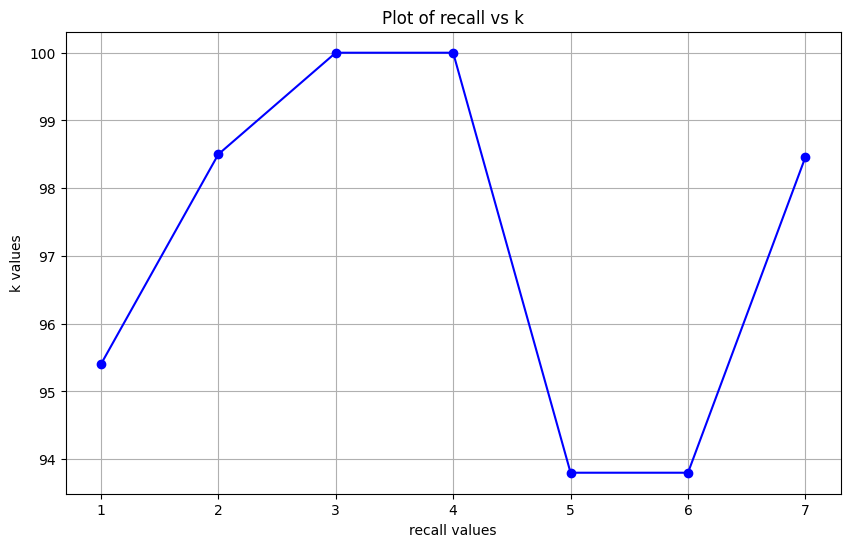

In [ ]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_values,  marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Plot of recall vs k')
plt.xlabel('recall values')
plt.ylabel('k values')

# Show grid
plt.grid()

# Show the plot
plt.show()

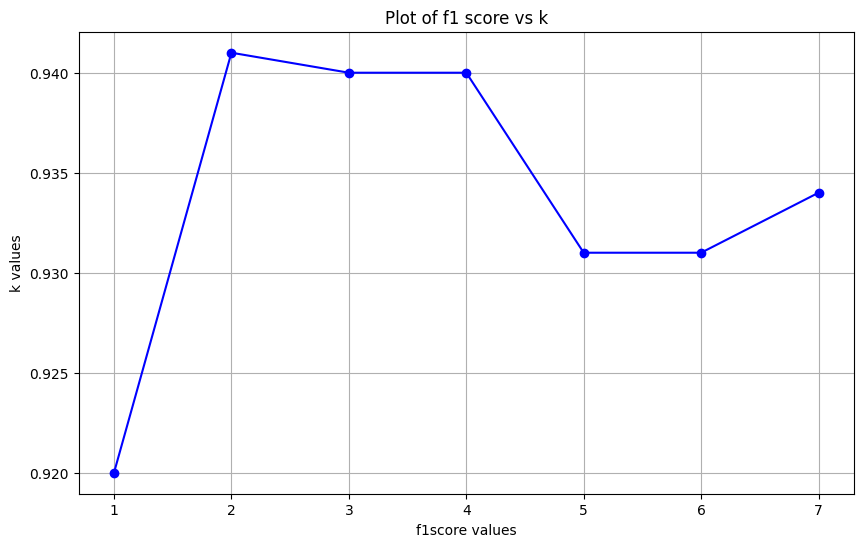

In [ ]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Plot of f1 score vs k')
plt.xlabel('f1score values')
plt.ylabel('k values')

# Show grid
plt.grid()

# Show the plot
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_breast_pca = pca.fit_transform(X_breast_train)
SVM_model = SVC(kernel='sigmoid', C=1E10)
SVM_model.fit(X_breast_pca, Y_breast_train)

SVC(C=10000000000.0, kernel='sigmoid')

Text(0.5, 427.9555555555555, 'Predicted label')

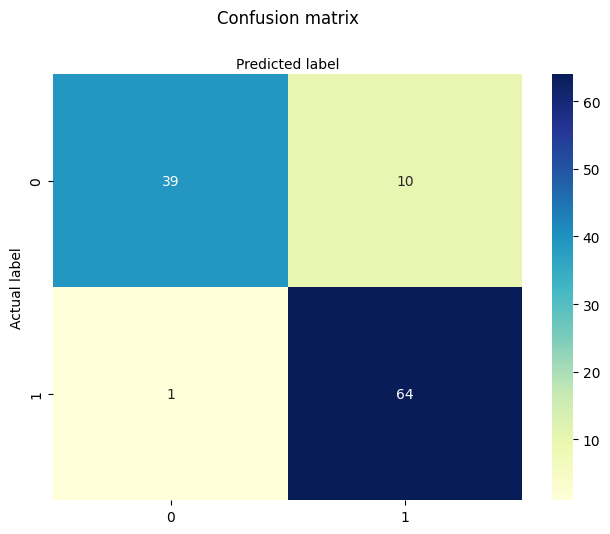

In [ ]:
X_breast_pca_test = pca.fit_transform(X_breast_test)
Y_breast_prediction = SVM_model.predict(X_breast_pca_test)
cmatrix_breast_penalty = confusion_matrix(Y_breast_test, Y_breast_prediction)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast_penalty), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y_breast_prediction))
print("Precision:",metrics.precision_score(Y_breast_test, Y_breast_prediction))
print("Recall:",metrics.recall_score(Y_breast_test, Y_breast_prediction))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y_breast_prediction))

Accuracy: 0.9035087719298246
Precision: 0.8648648648648649
Recall: 0.9846153846153847
F1 Score: 0.920863309352518


In [11]:
file_path = '/content/drive/My Drive/Intro-to-ML/Housing.csv'
sample = pd.DataFrame(pd.read_csv(file_path))

In [12]:
#varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})
#test = binary_map(varlist)

In [13]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
sample[varlist] = sample[varlist].apply(binary_map)
np.random.seed(0)
train_set, test_set = train_test_split(sample, train_size = .8, test_size = .2, random_state = 100)
Y_train = train_set.pop('price')
Y_test = test_set.pop('price')
junk = train_set.pop('furnishingstatus') #Gotta remove this, its not used
junk = test_set.pop('furnishingstatus') #Same with this
train_set_all = train_set.to_numpy()
test_set_all = test_set.to_numpy()
sample
sscale = StandardScaler()
x_house_train = sscale.fit_transform(train_set_all)
x_house_test = sscale.fit_transform(test_set_all)

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [17]:
k_values = [0, 1, 2, 3, 4, 5]
lin_error = [0,0,0,0,0,0,0,0]
rbf_error = [0,0,0,0,0,0,0,0]
sig_error = [0,0,0,0,0,0,0,0]
poly_error = [0,0,0,0,0,0,0,0]
for k in k_values:
  pca = PCA(n_components=k+1)
  X_pca_house = pca.fit_transform(x_house_train)
  X_pca_test = pca.fit_transform(x_house_test)
  SVR_model = SVR(kernel='linear', C=1E10)
  SVR_model.fit(X_pca_house, Y_train)
  y_pred_lin = SVR_model.predict(X_pca_test)
  SVR_model_rbf = SVR(kernel='rbf', C=1E10)
  SVR_model_rbf.fit(X_pca_house, Y_train)
  y_pred_rbf = SVR_model_rbf.predict(X_pca_test)
  SVR_model_sig = SVR(kernel='sigmoid', C=1E10)
  SVR_model_sig.fit(X_pca_house, Y_train)
  y_pred_sig = SVR_model_sig.predict(X_pca_test)
  SVR_model_poly = SVR(kernel='poly', C=1E10)
  SVR_model_poly.fit(X_pca_house, Y_train)
  y_pred_poly = SVR_model_poly.predict(X_pca_test) # Predictions
  lin_error[k] = mean_squared_error(Y_test,y_pred_lin)
  rbf_error[k] = mean_squared_error(Y_test,y_pred_rbf)
  sig_error[k] = mean_squared_error(Y_test,y_pred_sig)
  poly_error[k] = mean_squared_error(Y_test,y_pred_poly)

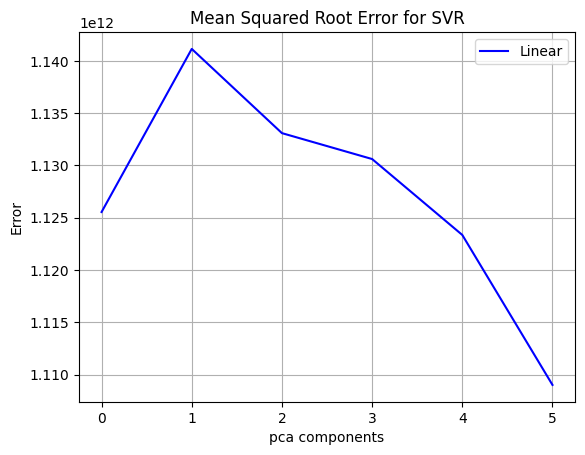

In [24]:
plt.plot(k_values, lin_error[:6], color='blue', label='Linear')
plt.grid()
plt.xlabel('pca components')
plt.ylabel('Error')
plt.title('Mean Squared Root Error for SVR')
plt.legend()
plt.show()

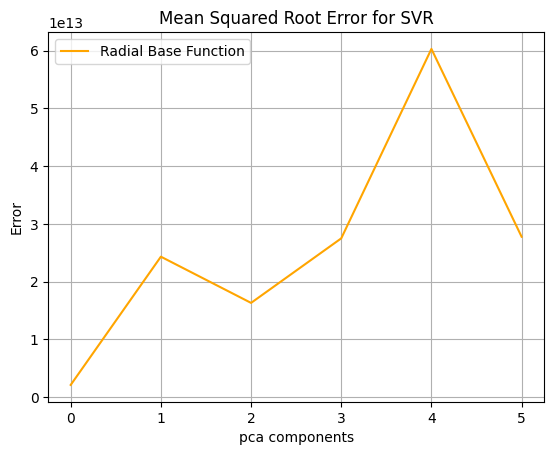

In [25]:
plt.plot(k_values, rbf_error[:6], color='orange', label='Radial Base Function')
plt.grid()
plt.xlabel('pca components')
plt.ylabel('Error')
plt.title('Mean Squared Root Error for SVR')
plt.legend()
plt.show()

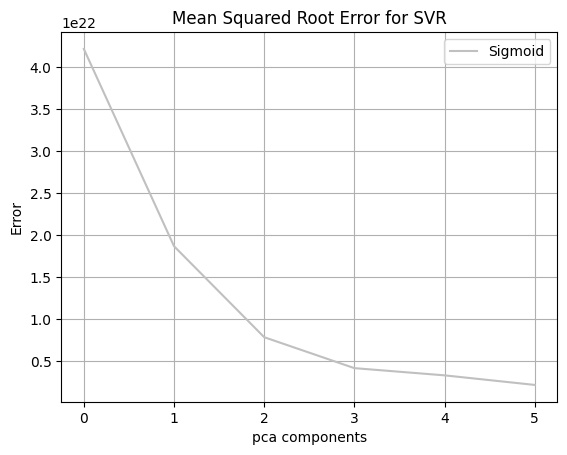

In [26]:
plt.plot(k_values, sig_error[:6], color='silver', label='Sigmoid')
plt.grid()
plt.xlabel('pca components')
plt.ylabel('Error')
plt.title('Mean Squared Root Error for SVR')
plt.legend()
plt.show()

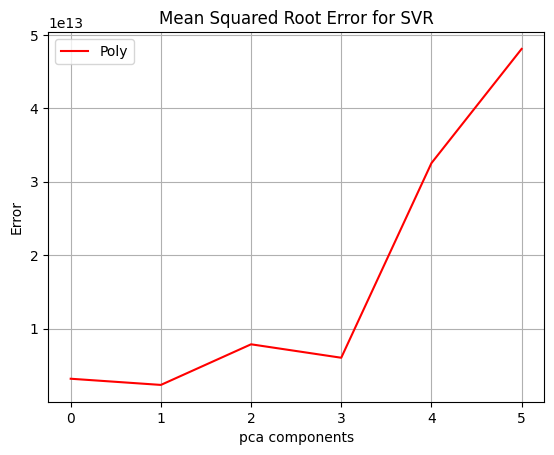

In [27]:
plt.plot(k_values, poly_error[:6], color='red', label='Poly')
plt.grid()
plt.xlabel('pca components')
plt.ylabel('Error')
plt.title('Mean Squared Root Error for SVR')
plt.legend()
plt.show()